# Crea Cualquier Gráfico desde Matplotlib.org

Hace un par de lecciones hice mención a los beneficios de saber **descubrir por ti mismo los recursos** con los que cuentas cuando estás trabajando con un determinado gráfico en Matplotlib, y como tu ya sabes esa misma lógica aplica para todos los objetos de Python:

> Un buen programador no es el que sabe y se acuerda todo lo que un objeto puede hacer, sino aquel que sabe como navegar en la documentación con `type()`, `dir()` y `help()`, para descubrir por sí mismo cómo funcionan las cosas.

En esta lección vamos a ir en el mismo sentido, porque luego de haberte enseñado cómo construir los principales tipos de gráficos en Matplotlib, ahora quiero enseñarte como construir **cualquier tipo de gráfico**, incluso aquellos que hoy no existen y que el día de mañana matplotlib agregue a su colección.

Entonces lo que te voy a enseñar es como surfear en la documentación para hacerlo por ti mismo. Como puedes ver en la [galería de gráficos de Matplotlib](https://matplotlib.org/stable/plot_types/index) hay muchas y muy vistosas opciones, y quiero que seas capaz de decir "*esté gráfico me sirve*", y que lo puedas usar por ti mismo.

Vamos a intentar representar una situación de la vida real, con el siguiente conjunto de datos:

In [38]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [39]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
df = pd.read_csv("C:/Users/leomendez/OneDrive/Documentos/00. Industria 4_0/Python Scripts/Python para Data Science & Machine Learning en 18 Días/Iluminacion.csv")
df 

,Latitud,Longitud,Luminosidad
0,1.764052,-0.202117,49.929240
1,0.400157,-0.833231,98.656690
2,0.978738,1.733600,68.735218
3,2.240893,0.190649,85.794230
4,1.867558,-0.177810,50.499409
...,...,...,...
9995,-1.809282,0.271662,65.661394
9996,0.042359,-0.108997,42.123643
9997,0.516872,-0.057259,18.950191
9998,-0.032921,-1.058931,8.672976


En este conjunto de datos (que te vas a descargar de esta lección y vas a cargar en un DataFrame), se muestra la **intensidad lumínica** en el mapa de una ciudad.

El alcalde de la ciudad te ha pasado estas mediciones, que representan qué tan intensa es la **iluminación** que proveen **las farolas** en cada punto de la ciudad (representados por la `Longitud` y la `Latitud`). Mientras más farolas hay en cada área, más luz hay en esa área.

El alcalde te ha pedido que hagas un gráfico donde él pueda ver esos puntos (áreas) en una especie de mapa, para saber en qué áreas de la ciudad debería poner más farolas.

Lo primero que haces cuando sales de la oficina del alcalde es entrar en pánico, pero luego te tranquilizas y dices "*momento, será cuestión de encontrar un gráfico apropiado en la colección de Matplotlib y revisar su documentación para aprender a aplicarlo con estos datos*". Excelente. Ese es un momento de sabiduría, cuando dices "*no se trata de saber todo, se trata de saber cómo aprender*".

Cuando revisas la documentación de Matplotlib encuentras varias opciones, pero uno de ellos te llama la atención: dentro de la categoría **Distribución Estadística**, hay uno que se llama **[hexbin](https://matplotlib.org/stable/plot_types/stats/hexbin.html#sphx-glr-plot-types-stats-hexbin-py)** y parece ser que representa hexagonos contiguos, y los pinta de un mismo color pero con diferente intensidad según algún valor.

Vamos a ver si esto es lo que quiero.

In [41]:
help(plt.hexbin)

Help on function hexbin in module matplotlib.pyplot:

hexbin(
    x: 'ArrayLike',
    y: 'ArrayLike',
    C: 'ArrayLike | None' = None,
    *,
    gridsize: 'int | tuple[int, int]' = 100,
    bins: "Literal['log'] | int | Sequence[float] | None" = None,
    xscale: "Literal['linear', 'log']" = 'linear',
    yscale: "Literal['linear', 'log']" = 'linear',
    extent: 'tuple[float, float, float, float] | None' = None,
    cmap: 'str | Colormap | None' = None,
    norm: 'str | Normalize | None' = None,
    vmin: 'float | None' = None,
    vmax: 'float | None' = None,
    alpha: 'float | None' = None,
    linewidths: 'float | None' = None,
    edgecolors: "Literal['face', 'none'] | ColorType" = 'face',
    reduce_C_function: 'Callable[[np.ndarray | list[float]], float]' = <function mean at 0x000001C2B4072EF0>,
    mincnt: 'int | None' = None,
    marginals: 'bool' = False,
    colorizer: 'Colorizer | None' = None,
    data=None,
    **kwargs
) -> 'PolyCollection'
    Make a 2D hexagonal bin

Después de revisar un poco la documentación, parece ser que este es el gráfico que busco:
	- **x** sería `Latitud`
	- **y** sería `Longitud`
	- **C** sería la `Luminosidad`

Volvemos a la documentación para poder ver un [ejemplo específico de `hexbin()`](https://matplotlib.org/stable/plot_types/stats/hexbin.html#sphx-glr-plot-types-stats-hexbin-py).

Como ya tienes algo de experiencia escribiendo código, al ver el código de ejemplo en el sitio web, puedes interpretar lo siguiente:
- La **primera parte** son las **librerías** que hay que importar
- La **segunda parte** aplica un **estilo** al gráfico. Dejemos esto de lado por ahora ya que nos interesa conocer su estructura.
- La **tercera parte** es la construcción de los **datos** que se van a usar en este ejemplo. No necesitamos esta parte, porque nosotros ya tenemos nuestros datos.
- Y finalmente la **última parte**, es el **código** para generar un hexbin.

Copiemos esa**última parte** (menos el `show()`) y lo traigamos a nuestro cuaderno, para editarlo aquí.


```
fig, ax = plt.subplots()
ax.hexbin(x, y, gridsize=20)
ax.set(xlim=(-2, 2), ylim=(-3, 3))
```

Este es el código que me he traido desde el ejemplo del sitio, pero lo voy a modificar en algunos aspectos:
- Cambio *x* e *y* por mis propias series
- Elimino la linea de `ax.set()`, ya que si buscas en la ayuda, verás que solo sirve para establecer los límites de los ejes, pero esto está basado en los datos del ejemplo, y no en los nuestros así que lo elimino.

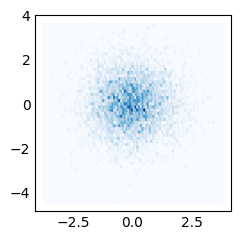

In [58]:
fig, ax = plt.subplots()
ax.hexbin(df['Latitud'], df['Longitud'], gridsize=100);

Al ejecutar este código vemos un gráfico bonito pero extraño. Esto no parece representar lo que buscamos.

En ese momento recordamos que en ningún momento le hemos pasado la información sobre la **luminosidad**, que debería ir en el parámetro `C` de `hexbin()`.

Revisamos la ayuda, y vemos que se escribe de esta manera:

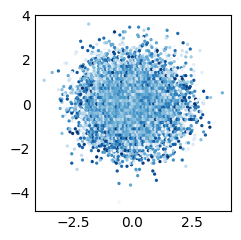

In [43]:
fig, ax = plt.subplots()
ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=100);

Ahora sí ya estamos viendo algo mucho más parecido a lo que buscamos, pero todavía le falta. Todavía no estamos mostrando información suficiente para que el alcalde pueda interpretar este gráfico.

Entonces aquí es donde comenzamos a **buscar en la ayuda** con **SHIFT + TAB**, para conocer todas las opciones que nos brinda `hexbin()`, o nos vamos directamente a la documentación, ya que si haces click en la función "*ax.hexbin()*" del ejemplo, serás llevado a la [página específica](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hexbin.html#matplotlib.axes.Axes.hexbin) con la documentación del método `hexbin()`.

A continuación comenzaré a **agregar parámetros y métodos**, que ayudarán a darle la forma definitiva a mi gráfico.

El parámetro `grindsize` es el tamaño del *grind*, y lo puedo modificar para que sea más o menos detallado.

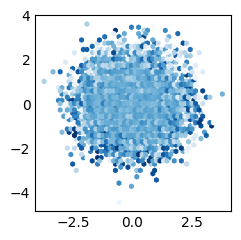

In [44]:
fig, ax = plt.subplots()
ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=50);

Con `cmap` puedo establecer un **mapa de colores** basado en gamas.

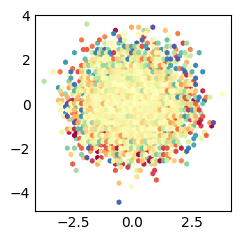

In [45]:
fig, ax = plt.subplots()
ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=50, cmap='Spectral_r');

Y luego puedo seguir agregando cosas que son universales a todos los gráficos de Matplotlib, y que las puedo descubrir navegando por los recursos de `plt`.

Los objetos **axes** tienen un parámetro llamado `set_facecolor()` que me permite modificar el **color de fondo** del axes.

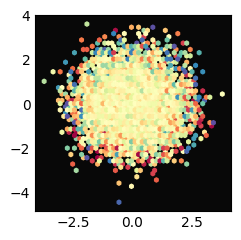

In [53]:
fig, ax = plt.subplots()
ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=50, cmap='Spectral_r')
ax.set_facecolor("#080808");

Matplotlib también me ofrece el método `colorbar()` para que mis gráficos puedan tener una **barra de colores** lateral, que sirva como referencia para los colores de mi gráfico.

Ten en cuenta que para configurarla, dentro de sus parámetros debo debo pasarle el gráfico en sí, y por esa razón lo he puesto ahora dentro de la variable `hb`.

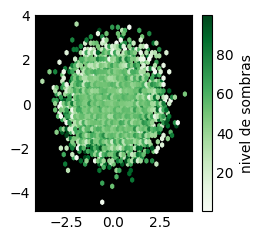

In [54]:
fig, ax = plt.subplots()
hb = ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=50, cmap='Greens')
ax.set_facecolor('#000000')
plt.colorbar(hb, label="nivel de sombras");

Los métodos `xlabel()` y `ylabel()` sirven para asignarle una **etiqueta** a los ejes *x* e *y*, respectivamente.

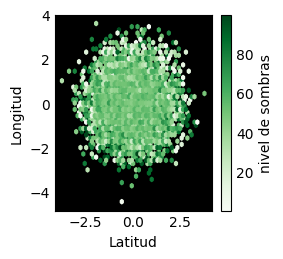

In [48]:
fig, ax = plt.subplots()
hb = ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=50, cmap='Greens')
ax.set_facecolor('#000000')
plt.colorbar(hb, label="nivel de sombras")
plt.xlabel("Latitud")
plt.ylabel("Longitud");

Y finalmente con `title()` puedo crear un **título** para todo el gráfico.

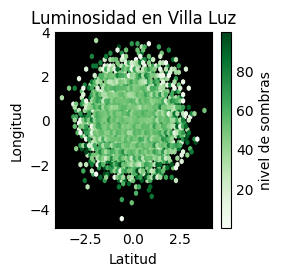

In [49]:
fig, ax = plt.subplots()
hb = ax.hexbin(df['Latitud'], df['Longitud'], C=df['Luminosidad'], gridsize=50, cmap='Greens')
ax.set_facecolor('#000000')
plt.colorbar(hb, label="nivel de sombras")
plt.xlabel("Latitud")
plt.ylabel("Longitud")
plt.title("Luminosidad en Villa Luz");

Perdona si esta lección ha sido más extensa de lo habitual, pero espero que te pague con creces, en el nivel de autonomía que espero haberte ayudado a desarrollar.

    Latitud  Longitud  Luminosidad
0  1.764052 -0.202117    49.929240
1  0.400157 -0.833231    98.656690
2  0.978738  1.733600    68.735218
3  2.240893  0.190649    85.794230
4  1.867558 -0.177810    50.499409


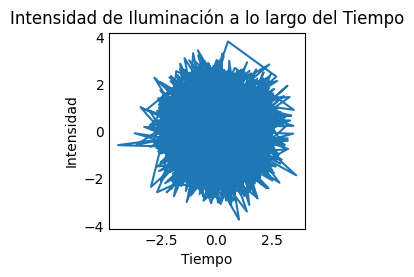

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ruta al archivo CSV (ajusta 'leo54623' a tu nombre de usuario si es diferente)
ruta = ("C:/Users/leomendez/OneDrive/Documentos/00. Industria 4_0/Python Scripts/Python para Data Science & Machine Learning en 18 Días/Iluminacion.csv")

# Leer el archivo CSV
df = pd.read_csv(ruta)

# Mostrar las primeras filas para comprobar la estructura
print(df.head())

# Supongamos que tienes columnas llamadas 'Tiempo' y 'Intensidad'
plt.plot(df['Longitud'], df['Latitud'])
plt.xlabel('Tiempo')
plt.ylabel('Intensidad')
plt.title('Intensidad de Iluminación a lo largo del Tiempo')
plt.show()